In [2]:
import nibabel as nib 
import numpy as snp 
import matplotlib.pyplot as plt 
import os 
from scipy import ndimage
from tqdm import tqdm

### Check the following: 
1) Common resolution to resample to 
2) Impact of kernel after resampling for paired data

In [ ]:
path = "/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked"
voxel_sizes = []
for folder in os.listdir(path):
    for file in os.listdir(os.path.join(path, folder)):
        if file.endswith(".nii.gz"):
            image = nib.load(os.path.join(path, folder,file))
            voxel_sizes.append(image.header.get_zooms())

In [11]:
voxel_sizes

[(0.7382812, 0.7382812, 2.0),
 (0.5761719, 0.5761719, 2.0),
 (0.6445312, 0.6445312, 2.0),
 (0.546875, 0.546875, 2.0),
 (0.54296875, 0.54296875, 1.800003),
 (0.5273438, 0.5273438, 2.0),
 (0.66796875, 0.66796875, 1.800003),
 (0.7226562, 0.7226562, 1.800003),
 (0.625, 0.625, 2.0),
 (0.70703125, 0.70703125, 1.7999992),
 (0.6445312, 0.6445312, 2.0),
 (0.609375, 0.609375, 1.5),
 (0.6640625, 0.6640625, 2.0),
 (0.6640625, 0.6640625, 2.0),
 (0.5273438, 0.5273438, 2.0),
 (0.7421875, 0.7421875, 1.7999992),
 (0.6445312, 0.6445312, 2.0),
 (0.5273438, 0.5273438, 1.800003),
 (0.6367188, 0.6367188, 2.0),
 (0.6640625, 0.6640625, 2.0),
 (0.6601562, 0.6601562, 2.0),
 (0.6835938, 0.6835938, 1.7999992),
 (0.546875, 0.546875, 1.8000002),
 (0.625, 0.625, 1.7999992),
 (0.74609375, 0.74609375, 2.0),
 (0.7421875, 0.7421875, 2.0),
 (0.55078125, 0.55078125, 2.0),
 (0.7265625, 0.7265625, 2.0),
 (0.57421875, 0.57421875, 1.8000002),
 (0.6484375, 0.6484375, 1.800003),
 (0.73828125, 0.73828125, 2.0),
 (0.765625, 0.765

In [ ]:
#check for the voxel size that occurs the most
from collections import Counter
Counter(voxel_sizes).most_common()

[((0.6640625, 0.6640625, 2.0), 8),
 ((0.6445312, 0.6445312, 2.0), 4),
 ((0.5273438, 0.5273438, 2.0), 3),
 ((0.6835938, 0.6835938, 1.7999992), 3),
 ((0.6328125, 0.6328125, 2.0), 3),
 ((0.5664062, 0.5664062, 2.0), 3),
 ((0.7382812, 0.7382812, 2.0), 2),
 ((0.546875, 0.546875, 2.0), 2),
 ((0.625, 0.625, 2.0), 2),
 ((0.70703125, 0.70703125, 1.7999992), 2),
 ((0.6601562, 0.6601562, 2.0), 2),
 ((0.7421875, 0.7421875, 2.0), 2),
 ((0.7265625, 0.7265625, 2.0), 2),
 ((0.5859375, 0.5859375, 2.0), 2),
 ((0.640625, 0.640625, 2.0), 2),
 ((0.609375, 0.609375, 2.0), 2),
 ((0.68359375, 0.68359375, 2.0), 2),
 ((0.703125, 0.703125, 2.0), 2),
 ((0.5761719, 0.5761719, 2.0), 1),
 ((0.54296875, 0.54296875, 1.800003), 1),
 ((0.66796875, 0.66796875, 1.800003), 1),
 ((0.7226562, 0.7226562, 1.800003), 1),
 ((0.609375, 0.609375, 1.5), 1),
 ((0.7421875, 0.7421875, 1.7999992), 1),
 ((0.5273438, 0.5273438, 1.800003), 1),
 ((0.6367188, 0.6367188, 2.0), 1),
 ((0.546875, 0.546875, 1.8000002), 1),
 ((0.625, 0.625, 1.7999

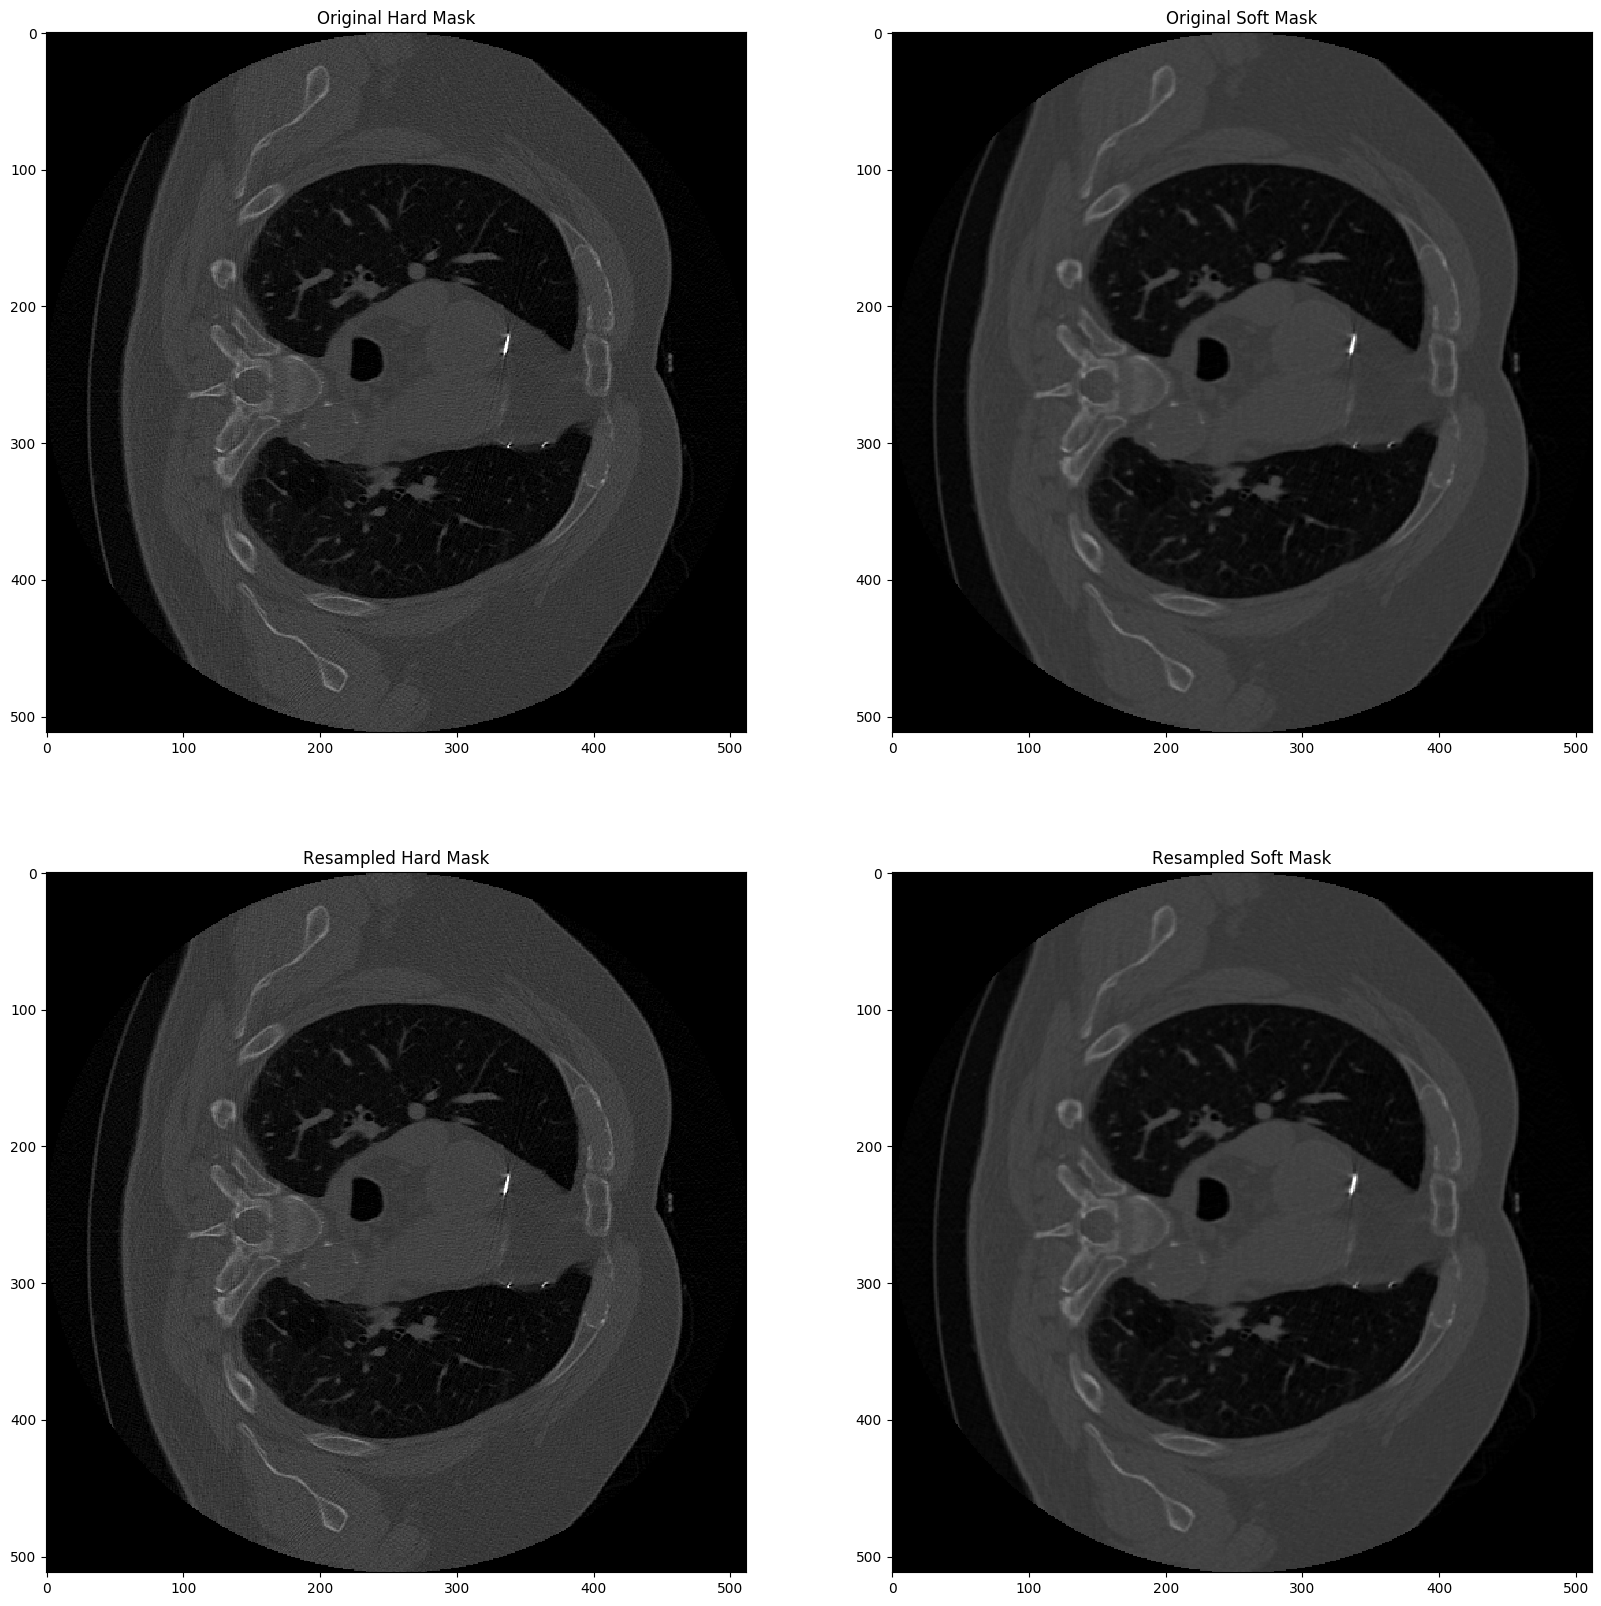

In [15]:
#Resample everything to 1x1x1
hard_image = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/122924.nii.gz")
soft_image = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/soft_masked/122924/122924.nii.gz")

hard_data = hard_image.get_fdata()
soft_data = soft_image.get_fdata()

hard_resampled = ndimage.zoom(hard_data, (1, 1, 1), order=3)
soft_resampled = ndimage.zoom(soft_data, (1, 1, 1), order=3)

#Plot the original and resampled images
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(hard_data[:,:,100], cmap="gray")
plt.title("Original Hard image")
plt.subplot(222)
plt.imshow(soft_data[:,:,100], cmap="gray")
plt.title("Original Soft image")
plt.subplot(223)
plt.imshow(hard_resampled[:,:,100], cmap="gray")
plt.title("Resampled Hard image")
plt.subplot(224)
plt.imshow(soft_resampled[:,:,100], cmap="gray")
plt.title("Resampled Soft image")
plt.show()

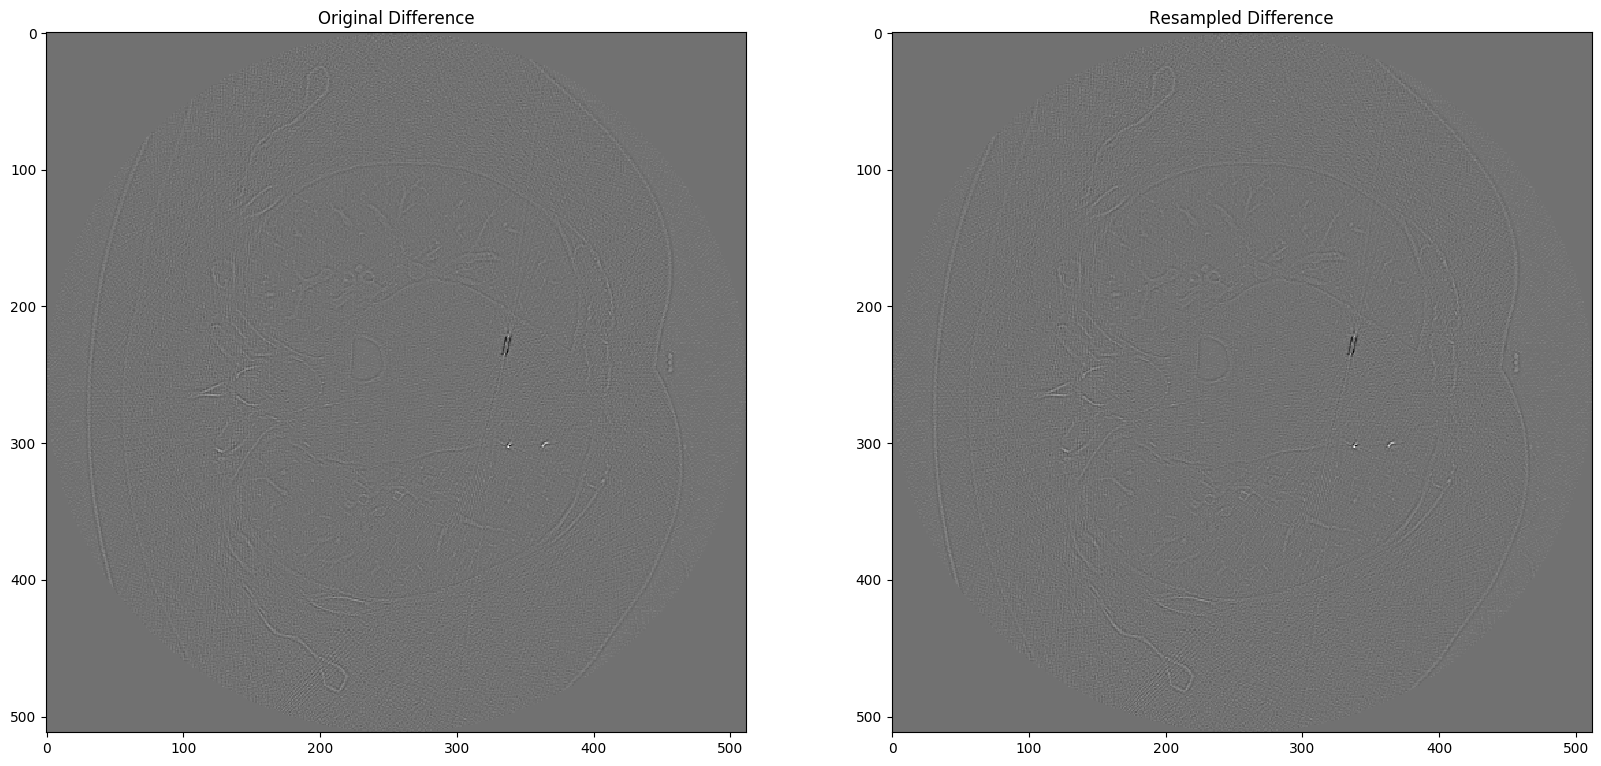

In [16]:
diffed = hard_resampled - soft_resampled
diff = hard_data - soft_data

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(diff[:,:,100], cmap="gray")
plt.title("Original Difference")
plt.subplot(222)
plt.imshow(diffed[:,:,100], cmap="gray")
plt.title("Resampled Difference")
plt.show()
